## Step 1: Importing the Data


In [167]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [168]:
# Importing important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [169]:
# Importing dataset

lead2 = pd.read_csv(r"C:\Users\ahsin\Downloads\Lead+Scoring+Case+Study\Lead Scoring Assignment\Leads.csv")

In [170]:
lead2.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


### Step 2: Inspecting the Dataframe

In [171]:
lead2.shape

(9240, 37)

In [172]:
# let's look at the statistical aspects of the dataframe
lead2.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [173]:
# Let's see the type of each column
lead2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

### Step 3: Data Cleaning


Handling the 'Select' level that is present in many of the categorical variables.
We observe that there are 'Select' values in many columns.It may be because the customer did not select any option from the list, hence it shows 'Select'.'Select' values are as good as NULL. So we can convert these values to null values.

In [174]:
lead2 = lead2.replace('Select',np.nan)

In [175]:
# checking the columns for null values
lead2.isnull().mean()*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
How did you hear about X Education               78.463203
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

We see that for some columns we have high percentage of missing values. We can drop the columns with missing values greater than 40%.

In [176]:
lead3 = lead2.drop(columns=['How did you hear about X Education','Lead Quality','Lead Profile','Asymmetrique Activity Index',
                           'Asymmetrique Profile Index','Asymmetrique Activity Score','Asymmetrique Profile Score'])

In [177]:
# Finding the null percentages across columns after removing the above columns
lead3.isnull().mean()*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Magazine                                          0.0000

Imputing Missing Values

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'Business Administration'),
  Text(1, 0, 'Media and Advertising'),
  Text(2, 0, 'Supply Chain Management'),
  Text(3, 0, 'IT Projects Management'),
  Text(4, 0, 'Finance Management'),
  Text(5, 0, 'Travel and Tourism'),
  Text(6, 0, 'Human Resource Management'),
  Text(7, 0, 'Marketing Management'),
  Text(8, 0, 'Banking, Investment And Insurance'),
  Text(9, 0, 'International Business'),
  Text(10, 0, 'E-COMMERCE'),
  Text(11, 0, 'Operations Management'),
  Text(12, 0, 'Retail Management'),
  Text(13, 0, 'Services Excellence'),
  Text(14, 0, 'Hospitality Management'),
  Text(15, 0, 'Rural and Agribusiness'),
  Text(16, 0, 'Healthcare Management'),
  Text(17, 0, 'E-Business')])

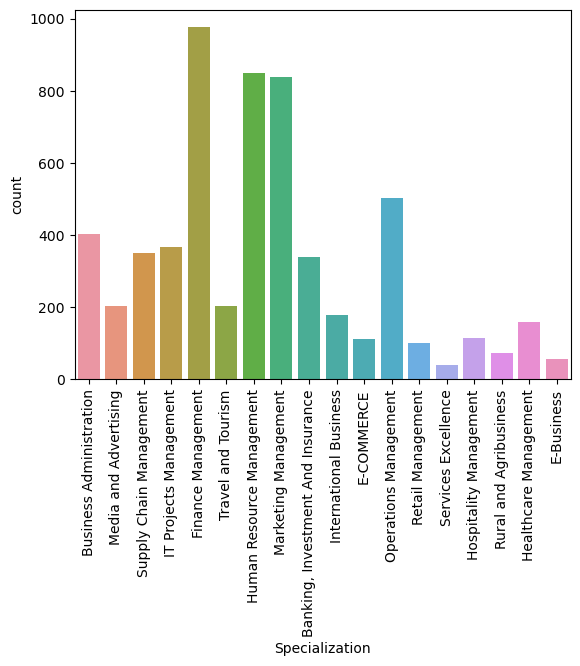

In [178]:
# Column Specialization has 37% missing values
sns.countplot(lead3,x='Specialization')
plt.xticks(rotation=90)

Replacing the missing values with Others as the Students can also fill up the information or there could be any other specialization.

In [179]:
lead3['Specialization'] = lead3['Specialization'].replace(np.nan,'Others')

2. Column Country

In [180]:
lead3['Country'].value_counts()

Country
India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malays

Replacing the missing values with INDIA

In [181]:
lead3['Country']= lead3['Country'].replace(np.nan,'India')

In [182]:
#3. Column - 'What is your current occupation'
lead3['What is your current occupation'].value_counts()

What is your current occupation
Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: count, dtype: int64

Imputing the missing values with Unemployed

In [183]:
lead3['What is your current occupation']=lead3['What is your current occupation'].replace(np.nan,'Unemployed')

In [184]:
# 4.Column - 'What matters most to you in choosing a course'
lead3['What matters most to you in choosing a course'].value_counts()

What matters most to you in choosing a course
Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: count, dtype: int64

This columns seems irrelevant so deleting this.

In [185]:
lead3 = lead3.drop('What matters most to you in choosing a course',axis=1)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 [Text(0, 0, 'Interested in other courses'),
  Text(1, 0, 'Ringing'),
  Text(2, 0, 'Will revert after reading the email'),
  Text(3, 0, 'Lost to EINS'),
  Text(4, 0, 'In confusion whether part time or DLP'),
  Text(5, 0, 'Busy'),
  Text(6, 0, 'switched off'),
  Text(7, 0, 'in touch with EINS'),
  Text(8, 0, 'Already a student'),
  Text(9, 0, 'Diploma holder (Not Eligible)'),
  Text(10, 0, 'Graduation in progress'),
  Text(11, 0, 'Closed by Horizzon'),
  Text(12, 0, 'number not provided'),
  Text(13, 0, 'opp hangup'),
  Text(14, 0, 'Not doing further education'),
  Text(15, 0, 'invalid number'),
  Text(16, 0, 'wrong number given'),
  Text(17, 0, 'Interested  in full time MBA'),
  Text(18, 0, 'Still Thinking'),
  Text(19, 0, 'Lost to Others'),
  Text(20, 0, 'Shall take in the next coming month'),
  Text(21, 0, 'Lateral student'),
  Text(22, 0, 'Interested in Next batc

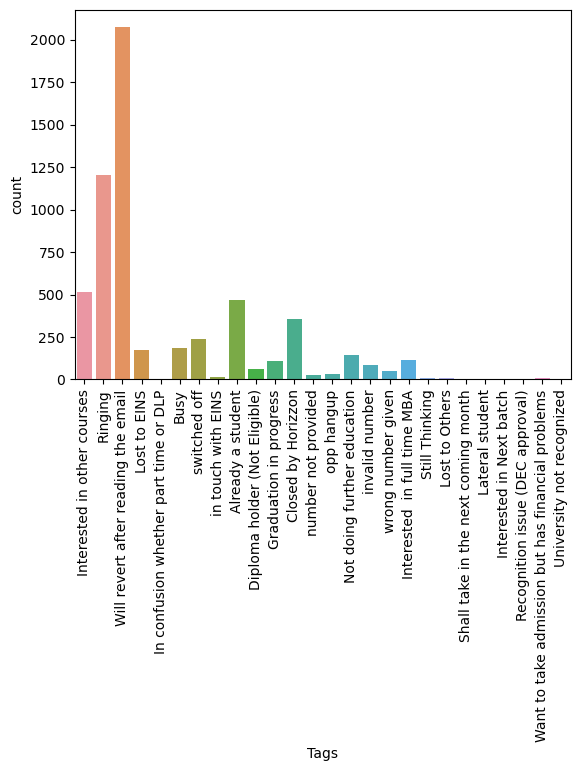

In [186]:
# 5.Column - Tags

sns.countplot(lead3, x='Tags')
plt.xticks(rotation=90)

Replacing the missing values with 'Will revert after reading the email'


In [187]:
lead3['Tags']=lead3['Tags'].replace(np.nan,'Will revert after reading the email')

In [188]:
# 6. Column - City
lead3['City'].value_counts()

City
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: count, dtype: int64

In [189]:
# Imputing the missing data in the 'City' column with 'Mumbai'

lead3['City']=lead3['City'].replace(np.nan,'Mumbai')

In [190]:
# Finding the null percentages across columns after imputing the above columns

lead3.isnull().mean()

Prospect ID                                 0.000000
Lead Number                                 0.000000
Lead Origin                                 0.000000
Lead Source                                 0.003896
Do Not Email                                0.000000
Do Not Call                                 0.000000
Converted                                   0.000000
TotalVisits                                 0.014827
Total Time Spent on Website                 0.000000
Page Views Per Visit                        0.014827
Last Activity                               0.011147
Country                                     0.000000
Specialization                              0.000000
What is your current occupation             0.000000
Search                                      0.000000
Magazine                                    0.000000
Newspaper Article                           0.000000
X Education Forums                          0.000000
Newspaper                                   0.

In [191]:
# Dropping the rows with null values
lead3.dropna(inplace = True)

In [192]:
lead3.isnull().mean()

Prospect ID                                 0.0
Lead Number                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
Country                                     0.0
Specialization                              0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                 

## Exploratory Data Analysis

Lead Origin

In [193]:
# creating new column Converted_str having the data type 'string' for visualising the data
lead3['Converted_str']=lead3['Converted'].astype(str)

(array([0, 1, 2, 3]),
 [Text(0, 0, 'API'),
  Text(1, 0, 'Landing Page Submission'),
  Text(2, 0, 'Lead Add Form'),
  Text(3, 0, 'Lead Import')])

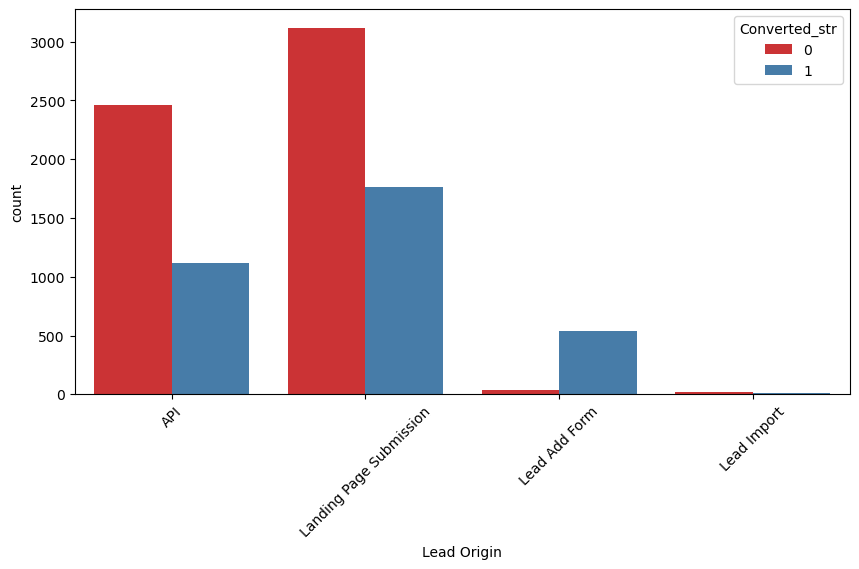

In [194]:
plt.figure(figsize=(10,5))
sns.countplot(x = "Lead Origin", hue = "Converted_str", data = lead3,palette='Set1')
plt.xticks(rotation = 45)

Inference:

1. API and Landing Page Submission has considerable amount of lead conversion around 35%.
2. Lead Add Form has around 90% conversion rate but the count is not high.

To improve overall lead conversion rate, we need to focus more on improving lead conversion of API and Landing Page Submission origin and generate more leads from Lead Add Form.


Lead Source

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 [Text(0, 0, 'Olark Chat'),
  Text(1, 0, 'Organic Search'),
  Text(2, 0, 'Direct Traffic'),
  Text(3, 0, 'Google'),
  Text(4, 0, 'Referral Sites'),
  Text(5, 0, 'Reference'),
  Text(6, 0, 'google'),
  Text(7, 0, 'Welingak Website'),
  Text(8, 0, 'Facebook'),
  Text(9, 0, 'blog'),
  Text(10, 0, 'Pay per Click Ads'),
  Text(11, 0, 'bing'),
  Text(12, 0, 'Social Media'),
  Text(13, 0, 'WeLearn'),
  Text(14, 0, 'Click2call'),
  Text(15, 0, 'Live Chat'),
  Text(16, 0, 'welearnblog_Home'),
  Text(17, 0, 'youtubechannel'),
  Text(18, 0, 'testone'),
  Text(19, 0, 'Press_Release'),
  Text(20, 0, 'NC_EDM')])

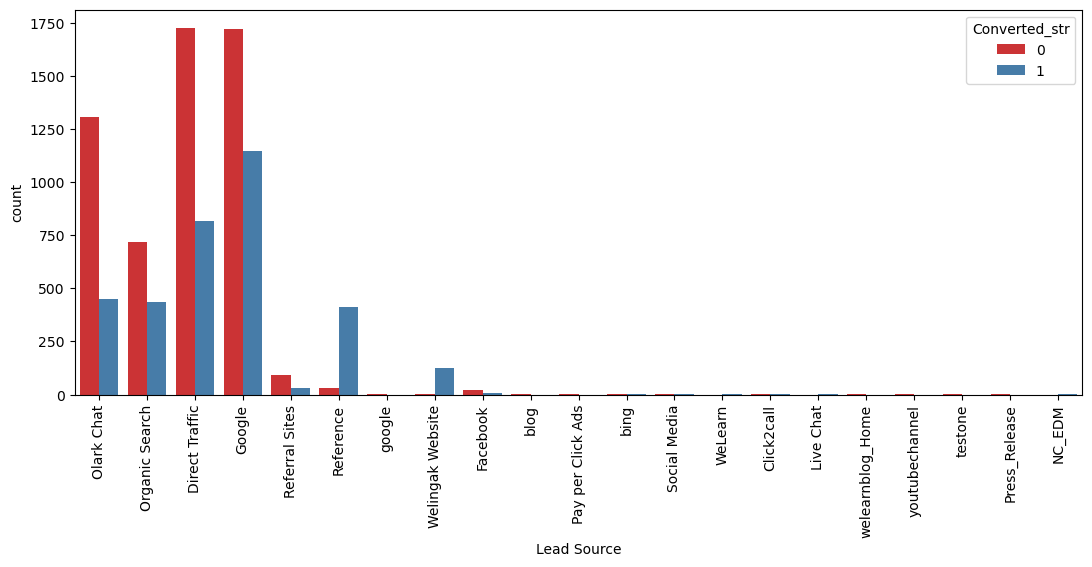

In [195]:
plt.figure(figsize=(13,5))
sns.countplot(x = "Lead Source", hue = "Converted_str", data = lead3, palette='Set1')
plt.xticks(rotation = 90)

In [196]:
# Replacing the lead sources which have least conversion into Others

lead3['Lead Source'] = lead3['Lead Source'].replace(['Click2call', 'Live Chat', 'NC_EDM', 'Pay per Click Ads', 'Press_Release',
  'Social Media', 'WeLearn', 'bing', 'blog', 'testone', 'welearnblog_Home', 'youtubechannel'], 'Others')

In [197]:
# replacing google with Google
lead3['Lead Source'] = lead3['Lead Source'].replace(['google'],'Google')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Olark Chat'),
  Text(1, 0, 'Organic Search'),
  Text(2, 0, 'Direct Traffic'),
  Text(3, 0, 'Google'),
  Text(4, 0, 'Referral Sites'),
  Text(5, 0, 'Reference'),
  Text(6, 0, 'Welingak Website'),
  Text(7, 0, 'Facebook'),
  Text(8, 0, 'Others')])

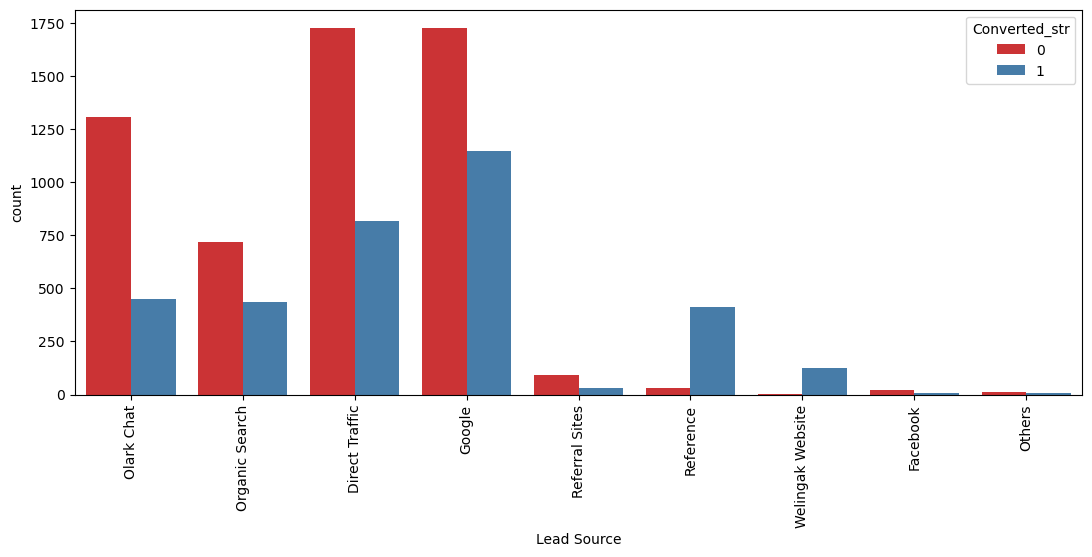

In [198]:
plt.figure(figsize=(13,5))
sns.countplot(x = "Lead Source", hue = "Converted_str", data = lead3, palette='Set1')
plt.xticks(rotation = 90)

1.Google and Direct Traffic are generating the maximum number of Leads


2.Reference has highest conversion rate.

'TotalVisits','Total Time Spent on Website','Page Views Per Visit'

In [199]:
# Checking for outliers in the continuous variables

num_lead = lead3[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]

In [200]:
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%

num_lead.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000
mean,3.456028,482.887481,2.370151
std,4.858802,545.256560,2.160871
min,0.000000,0.000000,0.000000
25%,1.000000,11.000000,1.000000
50%,3.000000,246.000000,2.000000
75%,5.000000,922.750000,3.200000
90%,7.000000,1373.000000,5.000000
95%,10.000000,1557.000000,6.000000
99%,17.000000,1839.000000,9.000000


From the distribution shown above, we can see that there are outliers in the data.

<Axes: >

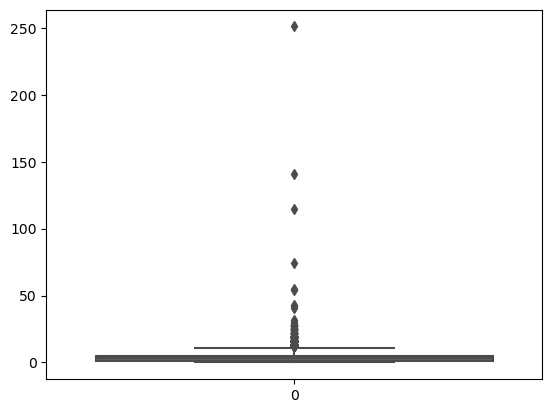

In [201]:
# checking for TotalVisits
sns.boxplot(lead3['TotalVisits'],palette='Set1',orient='vert')

As we can see there are a number of outliers in the data. We will cap the outliers to 95% value for analysis.


In [202]:
percentiles = lead3['TotalVisits'].quantile([0.05,0.95]).values
lead3['TotalVisits'][lead3['TotalVisits']<=percentiles[0]]=percentiles[0]
lead3['TotalVisits'][lead3['TotalVisits']>=percentiles[1]]=percentiles[1]


<Axes: xlabel='Converted_str', ylabel='TotalVisits'>

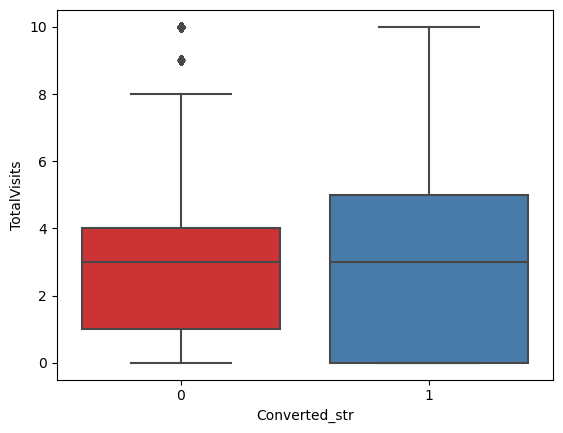

In [203]:
# Visualizing again
sns.boxplot(y='TotalVisits',x='Converted_str',data=lead3,palette='Set1')

Median for converted and not converted leads are the same.

<Axes: >

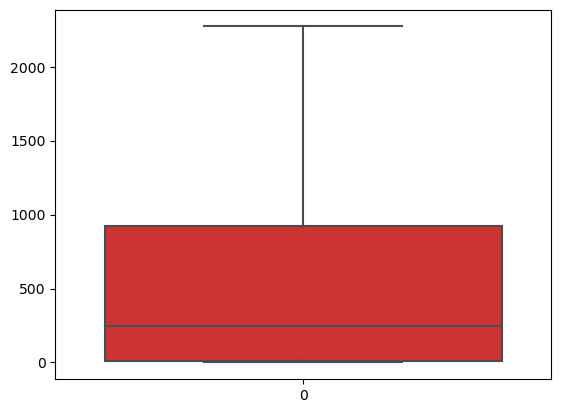

In [204]:
# checking for Total Time Spent on Website

sns.boxplot(lead3['Total Time Spent on Website'],palette='Set1')

<Axes: xlabel='Converted', ylabel='Total Time Spent on Website'>

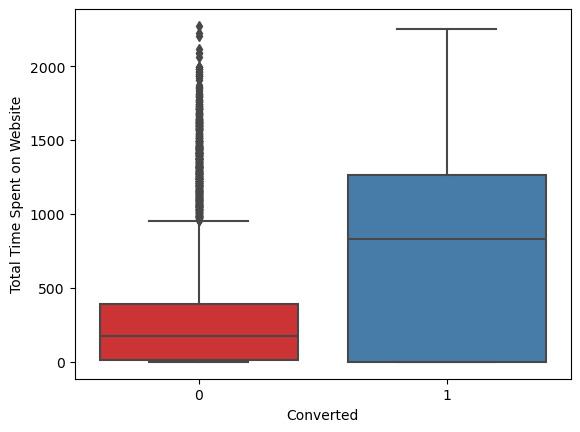

In [205]:
sns.boxplot(y='Total Time Spent on Website',x='Converted',palette='Set1',data=lead3)

Leads spending more time on the weblise are more likely to be converted.


<Axes: >

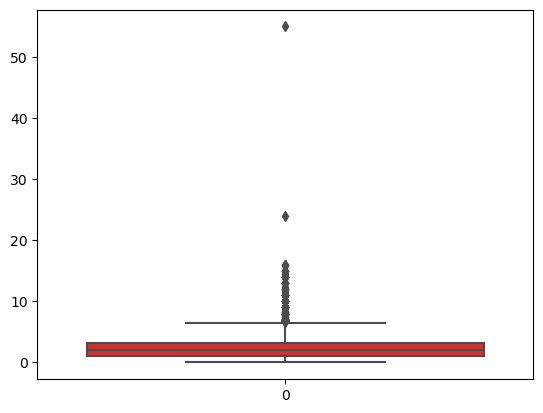

In [206]:
# Checking for Page Views Per Visit

sns.boxplot(lead3['Page Views Per Visit'],palette='Set1')

As we can see there are a number of outliers in the data. We will cap the outliers to 95% value for analysis.


In [207]:
percentiles = lead3['Page Views Per Visit'].quantile([0.05,0.95]).values
lead3['Page Views Per Visit'][lead3['Page Views Per Visit']<=percentiles[0]] = percentiles[0]
lead3['Page Views Per Visit'][lead3['Page Views Per Visit']>=percentiles[1]] = percentiles[1]

<Axes: >

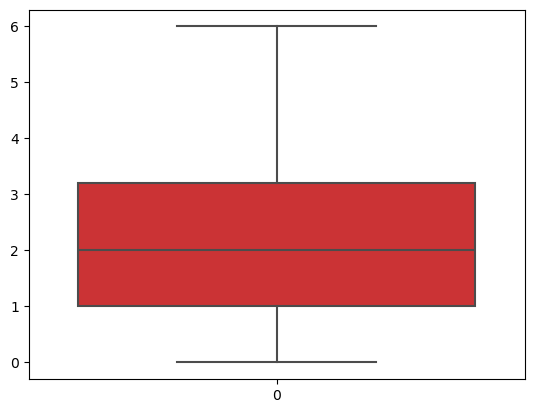

In [208]:
sns.boxplot(lead3['Page Views Per Visit'],palette='Set1')

<Axes: xlabel='Converted_str', ylabel='Page Views Per Visit'>

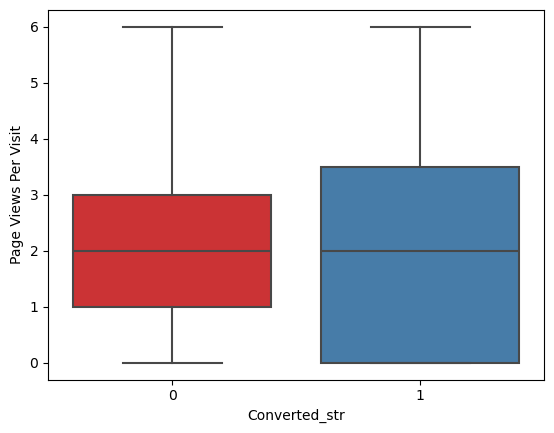

In [209]:
sns.boxplot(y='Page Views Per Visit',x='Converted_str',data=lead3,palette="Set1")

Median for converted and unconverted leads is the same.


Last Activity

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(0, 0, 'Page Visited on Website'),
  Text(1, 0, 'Email Opened'),
  Text(2, 0, 'Unreachable'),
  Text(3, 0, 'Converted to Lead'),
  Text(4, 0, 'Olark Chat Conversation'),
  Text(5, 0, 'Email Bounced'),
  Text(6, 0, 'Email Link Clicked'),
  Text(7, 0, 'Form Submitted on Website'),
  Text(8, 0, 'Unsubscribed'),
  Text(9, 0, 'Had a Phone Conversation'),
  Text(10, 0, 'View in browser link Clicked'),
  Text(11, 0, 'SMS Sent'),
  Text(12, 0, 'Visited Booth in Tradeshow'),
  Text(13, 0, 'Approached upfront'),
  Text(14, 0, 'Resubscribed to emails'),
  Text(15, 0, 'Email Received'),
  Text(16, 0, 'Email Marked Spam')])

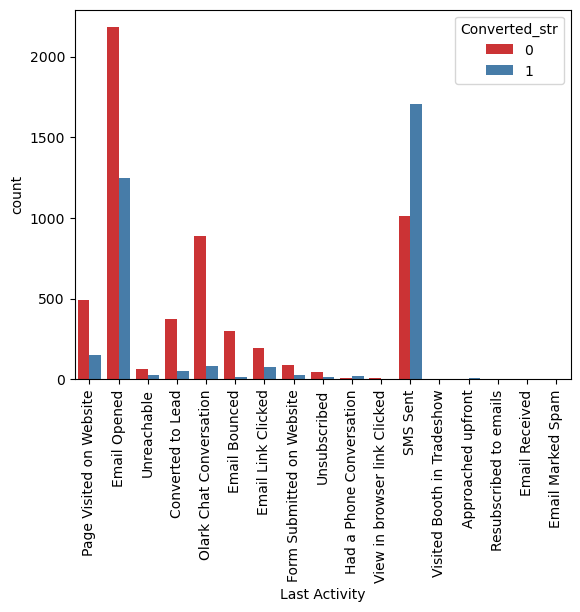

In [210]:
sns.countplot(x='Last Activity',hue='Converted_str',palette='Set1',data=lead3)
plt.xticks(rotation=90)

SMS sent has the highest conversion rate.


Most of the leads have the Email opened as the last activity

In [211]:
# Clubbing last activities to "Other_Activity" which are having less data.

lead3['Last Activity'] = lead3['Last Activity'].replace(['Had a Phone Conversation', 'View in browser link Clicked', 
                                                       'Visited Booth in Tradeshow', 'Approached upfront',
                                                       'Resubscribed to emails','Email Received', 'Email Marked Spam'], 'Other_Activity')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'Page Visited on Website'),
  Text(1, 0, 'Email Opened'),
  Text(2, 0, 'Unreachable'),
  Text(3, 0, 'Converted to Lead'),
  Text(4, 0, 'Olark Chat Conversation'),
  Text(5, 0, 'Email Bounced'),
  Text(6, 0, 'Email Link Clicked'),
  Text(7, 0, 'Form Submitted on Website'),
  Text(8, 0, 'Unsubscribed'),
  Text(9, 0, 'Other_Activity'),
  Text(10, 0, 'SMS Sent')])

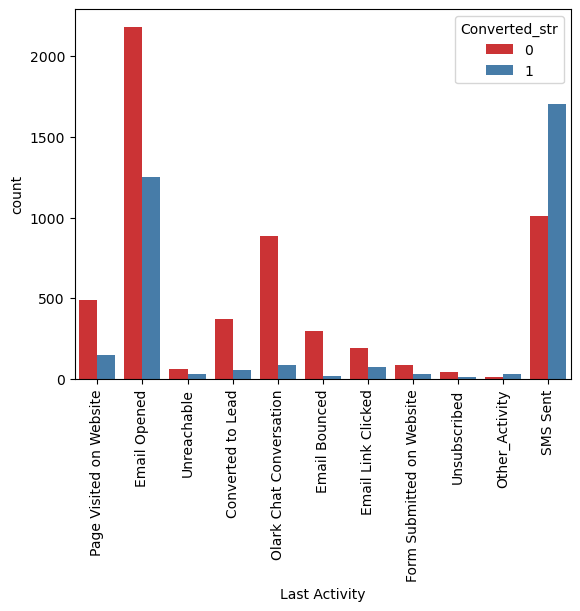

In [212]:
sns.countplot(x='Last Activity',hue='Converted_str',palette='Set1',data=lead3)
plt.xticks(rotation=90)

Specialization

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 [Text(0, 0, 'Others'),
  Text(1, 0, 'Business Administration'),
  Text(2, 0, 'Media and Advertising'),
  Text(3, 0, 'Supply Chain Management'),
  Text(4, 0, 'IT Projects Management'),
  Text(5, 0, 'Finance Management'),
  Text(6, 0, 'Travel and Tourism'),
  Text(7, 0, 'Human Resource Management'),
  Text(8, 0, 'Marketing Management'),
  Text(9, 0, 'Banking, Investment And Insurance'),
  Text(10, 0, 'International Business'),
  Text(11, 0, 'E-COMMERCE'),
  Text(12, 0, 'Operations Management'),
  Text(13, 0, 'Retail Management'),
  Text(14, 0, 'Services Excellence'),
  Text(15, 0, 'Hospitality Management'),
  Text(16, 0, 'Rural and Agribusiness'),
  Text(17, 0, 'Healthcare Management'),
  Text(18, 0, 'E-Business')])

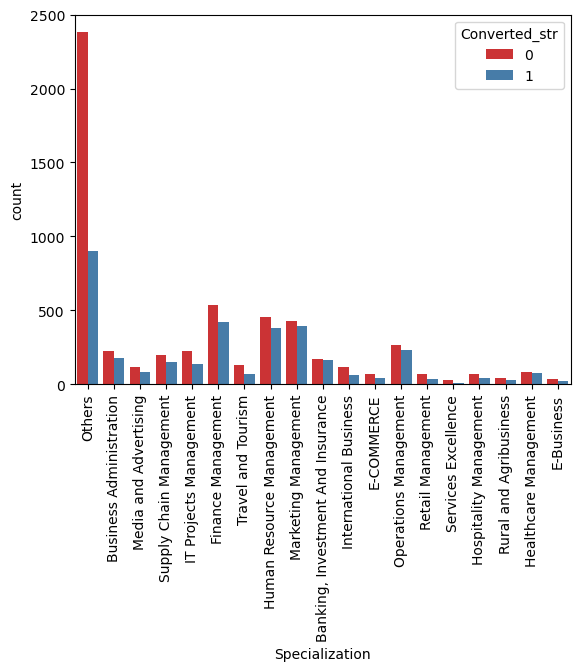

In [213]:
sns.countplot(x='Specialization',hue='Converted_str',palette='Set1',data=lead3)
plt.xticks(rotation=90)

High conversion rate Specializations should be targetted.

What is your current occupation


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Unemployed'),
  Text(1, 0, 'Student'),
  Text(2, 0, 'Working Professional'),
  Text(3, 0, 'Businessman'),
  Text(4, 0, 'Other'),
  Text(5, 0, 'Housewife')])

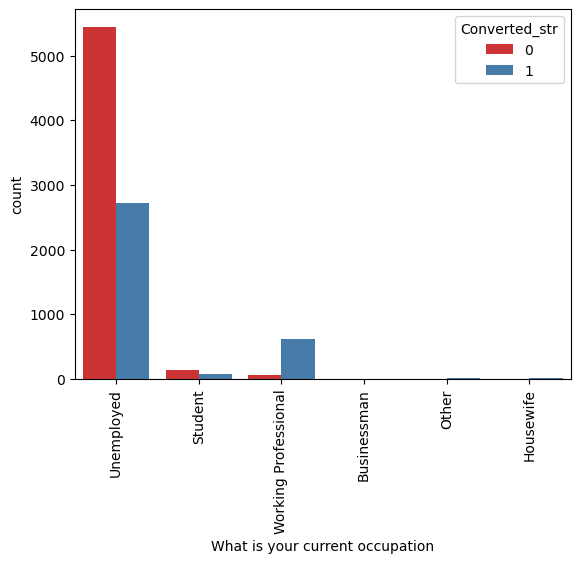

In [214]:
sns.countplot(x='What is your current occupation',hue='Converted_str',palette='Set1',data=lead3)
plt.xticks(rotation=90)

Working professional has highest conversion rates.

Tags


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 [Text(0, 0, 'Interested in other courses'),
  Text(1, 0, 'Ringing'),
  Text(2, 0, 'Will revert after reading the email'),
  Text(3, 0, 'Lost to EINS'),
  Text(4, 0, 'In confusion whether part time or DLP'),
  Text(5, 0, 'Busy'),
  Text(6, 0, 'switched off'),
  Text(7, 0, 'in touch with EINS'),
  Text(8, 0, 'Already a student'),
  Text(9, 0, 'Diploma holder (Not Eligible)'),
  Text(10, 0, 'Graduation in progress'),
  Text(11, 0, 'number not provided'),
  Text(12, 0, 'opp hangup'),
  Text(13, 0, 'Closed by Horizzon'),
  Text(14, 0, 'Not doing further education'),
  Text(15, 0, 'invalid number'),
  Text(16, 0, 'wrong number given'),
  Text(17, 0, 'Interested  in full time MBA'),
  Text(18, 0, 'Still Thinking'),
  Text(19, 0, 'Lost to Others'),
  Text(20, 0, 'Shall take in the next coming month'),
  Text(21, 0, 'Lateral student'),
  Text(22, 0, 'Interested in Next batc

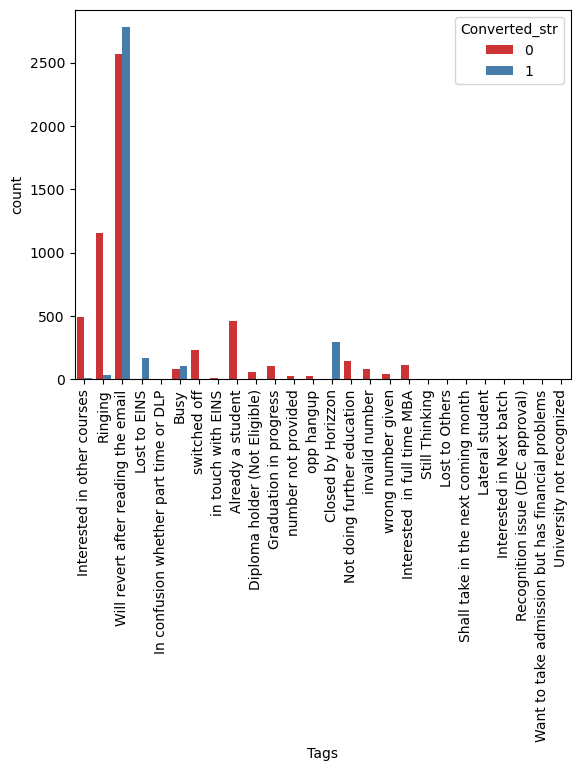

In [215]:
sns.countplot(x='Tags',hue='Converted_str',palette='Set1',data=lead3)
plt.xticks(rotation=90)

Based on the univariate analysis we have seen that many columns are not adding any information to the model, hence we can drop them for further analysis.Those Columns are-

Lead Number,Country, Search,Magazine,Newspaper Article,	X Education Forums,	Newspaper,	Digital Advertisement,	Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,
City,I agree to pay the amount through cheque,A free copy of Mastering The Interview




In [216]:
lead4 = lead3.drop(['Lead Number','Country','Search',
                  'Magazine','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations',
                  'Receive More Updates About Our Courses','Tags','Update me on Supply Chain Content','Get updates on DM Content',
                  'City','I agree to pay the amount through cheque','A free copy of Mastering The Interview'],axis=1)

In [217]:
lead4.shape

(9074, 14)

## Data Preparation

#### Converting some binary variables (Yes/No) to 0/1

In [218]:
varlist = ['Do Not Email','Do Not Call']

# Defining the map function
def binary_map(x):
    return x.map({'Yes':1,'No':0})

lead4[varlist] = lead4[varlist].apply(binary_map)

In [219]:
lead4.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Last Notable Activity,Converted_str
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,Modified,0
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,Others,Unemployed,Email Opened,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Email Opened,1
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Modified,0
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,Modified,1


#### For categorical variables with multiple levels, create dummy features 

In [220]:
# Creating a dummy variable for some of the categorical variables and dropping the first one

dummy1 = pd.get_dummies(lead4[['Lead Origin','Lead Source','Last Activity',
                               'Specialization','What is your current occupation','Last Notable Activity']],drop_first=True,dtype=int)

# Adding the results to the master dataframe
lead4 = pd.concat([lead4,dummy1],axis=1)

In [221]:
lead4.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,...,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,...,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,...,0,0,1,0,0,0,0,0,0,0


#### Dropping the columns for which dummies were created


In [222]:
lead4 = lead4.drop(['Lead Origin','Lead Source','Last Activity',
                               'Specialization','What is your current occupation','Last Notable Activity'],axis=1)

In [223]:
lead4.head()

,Prospect ID,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Converted_str,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,0,0,0,0.0,0,0.0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,0,0,0,5.0,674,2.5,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,0,0,1,2.0,1532,2.0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,0,0,0,1.0,305,1.0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,0,0,1,2.0,1428,1.0,1,1,0,...,0,0,1,0,0,0,0,0,0,0


#### Test-Train Split

In [224]:
from sklearn.model_selection import train_test_split

In [225]:
# Putting feature variable to X

X = lead4.drop(['Converted','Prospect ID','Converted_str'],axis=1)

X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,2.0,1532,2.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,2.0,1428,1.0,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0


In [226]:
# Putting response variable to y

y = lead4['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [227]:
# Splitting the data into train and test

X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=100)

#### Feature Scaling

In [228]:
from sklearn.preprocessing import StandardScaler

In [229]:
scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3009,0,0,-0.432779,-0.160255,-0.155018,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1012,1,0,-0.432779,-0.540048,-0.155018,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9226,0,0,-1.150329,-0.888650,-1.265540,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4750,0,0,-0.432779,1.643304,-0.155018,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7987,0,0,0.643547,2.017593,0.122613,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [230]:
# Checking the Lead Conversion rate

Converted = (sum(lead4['Converted'])/len(lead4['Converted'].index))*100

Converted

37.85541106458012

The lead conversion rate is almost 38%

Feature Selection Using RFE

In [231]:
from sklearn.linear_model import LogisticRegression
logreg =LogisticRegression()

In [232]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg,n_features_to_select=17)  # running RFE with 17 variables as output
rfe = rfe.fit(X_train,y_train)

In [233]:
rfe.support_

array([ True, False, False,  True, False,  True,  True, False, False,
       False,  True, False, False,  True, False,  True, False, False,
       False, False,  True,  True, False,  True, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False,  True,
       False, False, False,  True, False, False, False, False, False,
       False,  True,  True, False, False, False, False,  True, False,
       False])

In [234]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 11),
 ('TotalVisits', False, 23),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 22),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 2),
 ('Lead Source_Facebook', False, 25),
 ('Lead Source_Google', False, 26),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 38),
 ('Lead Source_Others', False, 30),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 48),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', False, 19),
 ('Last Activity_Email Link Clicked', False, 15),
 ('Last Activity_Email Opened', False, 10),
 ('Last Activity_Form Submitted on Website', False, 37),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Other_Activity', True, 1),
 ('Last Activity_Page Visited on Website', False, 14),
 ('Last Activity_SMS Sent', True, 1)

In [235]:
col = X_train.columns[rfe.support_]

In [236]:
X_train.columns[~rfe.support_]

Index(['Do Not Call', 'TotalVisits', 'Page Views Per Visit',
       'Lead Origin_Lead Import', 'Lead Source_Facebook', 'Lead Source_Google',
       'Lead Source_Organic Search', 'Lead Source_Others',
       'Lead Source_Referral Sites', 'Last Activity_Email Bounced',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Opened',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Page Visited on Website', 'Last Activity_Unreachable',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Hospitality Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_International Business',
       'Specialization_Marketing Management',
       'Specialization_Media and Advertising',
       'Specialization_Operations Management',

##### Assessing the model with StatsModels

In [237]:
import statsmodels.api as sm

X_train_sm = sm.add_constant(X_train[col])

# Logistic regression model
logm1 = sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
logm1.fit().summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6333
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2595.0
Date:                Tue, 17 Sep 2024   Deviance:                       5189.9
Time:                        12:56:47   Pearson chi2:                 6.52e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4030
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.1017      0.126     -0.805      0.421      -0.349       0.146
Do Not Email                                            -1.6717      0.191     -8.774      0.000      -2.045      -1.298
Total Time Spent on Website                              1.1012      0.040     27.219      0.000       1.022       1.181
Lead Origin_Landing Page Submission                     -1.1684      0.128     -9.117      0.000      -1.420      -0.917
Lead Origin_Lead Add Form                                1.5535      0.913      1.702      0.089      -0.236       3.343
Lead Source_Olark Chat                                   1.1016      0.123      8.967      0.000       0.861       1.342
Lead Source_Reference                                    1.7866      0.936      1.908      0.056      -0.048       3.622
Lead Source_Welingak Website                             4.3123      1.164      3.705      0.000       2.031       6.594
Last Activity_Olark Chat Conversation                   -0.9483      0.172     -5.528      0.000      -1.285      -0.612
Last Activity_Other_Activity                             1.8511      0.537      3.446      0.001       0.798       2.904
Last Activity_SMS Sent                                   1.3303      0.075     17.643      0.000       1.183       1.478
Last Activity_Unsubscribed                               1.3806      0.482      2.862      0.004       0.435       2.326
Specialization_Others                                   -1.1785      0.126     -9.363      0.000      -1.425      -0.932
What is your current occupation_Housewife               22.7345   1.52e+04      0.001      0.999   -2.99e+04    2.99e+04
What is your current occupation_Working Professional     2.6177      0.195     13.446      0.000       2.236       2.999
Last Notable Activity_Had a Phone Conversation           1.4088      1.223      1.151      0.250      -0.989       3.807
Last Notable Activity_Modified                          -0.8718      0.082    -10.688      0.000      -1.032      -0.712
Last Notable Activity_Unreachable                        1.5595      0.474      3.290      0.001       0.630       2.489
========================================================================================================================
"""

Since Pvalue of What is your current occupation_Housewife is very high, we can drop this.

In [238]:
col1 = col.drop('What is your current occupation_Housewife')

Model 2 

In [239]:
X_train_sm = sm.add_constant(X_train[col1])
logm2 = sm.GLM(y_train,X_train_sm, family=sm.families.Binomial())
logm2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6334
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2599.1
Date:                Tue, 17 Sep 2024   Deviance:                       5198.3
Time:                        12:56:47   Pearson chi2:                 6.54e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4022
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.0942      0.126     -0.746      0.456      -0.342       0.153
Do Not Email                                            -1.6740      0.191     -8.786      0.000      -2.047      -1.301
Total Time Spent on Website                              1.1005      0.040     27.230      0.000       1.021       1.180
Lead Origin_Landing Page Submission                     -1.1686      0.128     -9.128      0.000      -1.420      -0.918
Lead Origin_Lead Add Form                                1.5504      0.913      1.699      0.089      -0.239       3.339
Lead Source_Olark Chat                                   1.1001      0.123      8.958      0.000       0.859       1.341
Lead Source_Reference                                    1.8051      0.936      1.928      0.054      -0.030       3.640
Lead Source_Welingak Website                             4.3154      1.164      3.707      0.000       2.034       6.597
Last Activity_Olark Chat Conversation                   -0.9492      0.172     -5.533      0.000      -1.285      -0.613
Last Activity_Other_Activity                             1.8493      0.537      3.442      0.001       0.796       2.902
Last Activity_SMS Sent                                   1.3253      0.075     17.586      0.000       1.178       1.473
Last Activity_Unsubscribed                               1.3779      0.482      2.857      0.004       0.433       2.323
Specialization_Others                                   -1.1832      0.126     -9.406      0.000      -1.430      -0.937
What is your current occupation_Working Professional     2.6132      0.195     13.422      0.000       2.232       2.995
Last Notable Activity_Had a Phone Conversation           1.4031      1.224      1.147      0.251      -0.995       3.801
Last Notable Activity_Modified                          -0.8749      0.082    -10.731      0.000      -1.035      -0.715
Last Notable Activity_Unreachable                        1.5535      0.474      3.278      0.001       0.625       2.483
========================================================================================================================
"""

Pvalue of Last Notable Activity_Had a Phone Conversation is very high so dropping this.

In [240]:
col1=col1.drop('Last Notable Activity_Had a Phone Conversation')

Model-3

In [241]:
X_train_sm = sm.add_constant(X_train[col1])
logm3 = sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
logm3.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2599.9
Date:                Tue, 17 Sep 2024   Deviance:                       5199.8
Time:                        12:56:47   Pearson chi2:                 6.54e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4021
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.0902      0.126     -0.715      0.475      -0.338       0.157
Do Not Email                                            -1.6766      0.191     -8.789      0.000      -2.050      -1.303
Total Time Spent on Website                              1.0995      0.040     27.216      0.000       1.020       1.179
Lead Origin_Landing Page Submission                     -1.1690      0.128     -9.134      0.000      -1.420      -0.918
Lead Origin_Lead Add Form                                1.5496      0.913      1.698      0.090      -0.239       3.339
Lead Source_Olark Chat                                   1.0978      0.123      8.937      0.000       0.857       1.338
Lead Source_Reference                                    1.8045      0.936      1.928      0.054      -0.030       3.639
Lead Source_Welingak Website                             4.3179      1.164      3.710      0.000       2.037       6.599
Last Activity_Olark Chat Conversation                   -0.9443      0.172     -5.505      0.000      -1.281      -0.608
Last Activity_Other_Activity                             2.2024      0.463      4.759      0.000       1.295       3.109
Last Activity_SMS Sent                                   1.3248      0.075     17.581      0.000       1.177       1.473
Last Activity_Unsubscribed                               1.3797      0.482      2.860      0.004       0.434       2.325
Specialization_Others                                   -1.1871      0.126     -9.438      0.000      -1.434      -0.941
What is your current occupation_Working Professional     2.6094      0.195     13.408      0.000       2.228       2.991
Last Notable Activity_Modified                          -0.8812      0.081    -10.823      0.000      -1.041      -0.722
Last Notable Activity_Unreachable                        1.5512      0.474      3.273      0.001       0.622       2.480
========================================================================================================================
"""

P-value of Lead Origin_Lead Add Form is high,deleting this variable

In [242]:
col1 = col1.drop('Lead Origin_Lead Add Form')

Model-4

In [243]:
X_train_sm = sm.add_constant(X_train[col1])
logm4 = sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2601.5
Date:                Tue, 17 Sep 2024   Deviance:                       5203.0
Time:                        12:56:47   Pearson chi2:                 6.54e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4018
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.0717      0.126     -0.570      0.569      -0.318       0.175
Do Not Email                                            -1.6783      0.191     -8.798      0.000      -2.052      -1.304
Total Time Spent on Website                              1.0976      0.040     27.211      0.000       1.019       1.177
Lead Origin_Landing Page Submission                     -1.1863      0.128     -9.291      0.000      -1.437      -0.936
Lead Source_Olark Chat                                   1.0915      0.123      8.905      0.000       0.851       1.332
Lead Source_Reference                                    3.3401      0.242     13.812      0.000       2.866       3.814
Lead Source_Welingak Website                             5.8588      0.729      8.033      0.000       4.429       7.288
Last Activity_Olark Chat Conversation                   -0.9485      0.171     -5.531      0.000      -1.285      -0.612
Last Activity_Other_Activity                             2.1988      0.463      4.752      0.000       1.292       3.106
Last Activity_SMS Sent                                   1.3250      0.075     17.587      0.000       1.177       1.473
Last Activity_Unsubscribed                               1.3784      0.482      2.858      0.004       0.433       2.324
Specialization_Others                                   -1.1983      0.126     -9.536      0.000      -1.445      -0.952
What is your current occupation_Working Professional     2.6064      0.195     13.389      0.000       2.225       2.988
Last Notable Activity_Modified                          -0.8816      0.081    -10.833      0.000      -1.041      -0.722
Last Notable Activity_Unreachable                        1.5470      0.474      3.264      0.001       0.618       2.476
========================================================================================================================
"""

Checking for VIF values:

In [244]:
# Check for the VIF values of the feature variables.
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [245]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values,i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,Specialization_Others,2.17
3,Lead Source_Olark Chat,2.03
12,Last Notable Activity_Modified,1.79
2,Lead Origin_Landing Page Submission,1.70
6,Last Activity_Olark Chat Conversation,1.59
8,Last Activity_SMS Sent,1.57
1,Total Time Spent on Website,1.29
4,Lead Source_Reference,1.24
0,Do Not Email,1.21
11,What is your current occupation_Working Profes...,1.19


Since the VIF values and P-values of the above model are within the considerable range there is no need to drop anymore variables
and this is our final model.

Making Prediction on the Train set

In [246]:
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3009    0.192492
1012    0.107074
9226    0.329484
4750    0.866550
7987    0.802188
1281    0.745221
2880    0.097496
4971    0.965877
7536    0.851963
1248    0.772910
dtype: float64

In [247]:
# Reshaping into an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.19249248, 0.10707422, 0.32948401, 0.86654975, 0.80218826,
       0.74522141, 0.09749634, 0.96587701, 0.85196293, 0.77291036])

##### Creating a dataframe with the actual Converted flag and the predicted probabilities

In [248]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values,'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID']=y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,0,0.192492,3009
1,0,0.107074,1012
2,0,0.329484,9226
3,1,0.866550,4750
4,1,0.802188,7987


##### Creating new column 'predicted' with 1 if Converted_prob > 0.5 else 0

In [249]:
y_train_pred_final['Predicted']=y_train_pred_final.Converted_prob.map(lambda x: 1 if x>0.5 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted
0,0,0.192492,3009,0
1,0,0.107074,1012,0
2,0,0.329484,9226,0
3,1,0.866550,4750,1
4,1,0.802188,7987,1


Making the Confusion matrix

In [250]:
from sklearn import metrics

In [251]:
# Confusion matrix 

confusion=metrics.confusion_matrix(y_train_pred_final.Converted,y_train_pred_final.Predicted)
print(confusion)

[[3459  446]
 [ 710 1736]]


In [252]:
# Predicted     not_converted    converted
# Actual
# not_converted        3459      446
# converted            710       1736  

In [253]:
# Let's check the overall accuracy.

print(metrics.accuracy_score(y_train_pred_final.Converted,y_train_pred_final.Predicted))

0.8179814202487797


## Metrics beyond simply accuracy

In [254]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [255]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7097301717089125

In [256]:
# Let us calculate specificity
TN / float(TN+FP)

0.885787451984635

In [257]:
# Calculate false postive rate - predicting Converted when customer does not convert
print(FP/ float(TN+FP))

0.11421254801536491


In [258]:
# positive predictive value 
print (TP / float(TP+FP))

0.7956003666361137


In [259]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8296953705924682


We found out that our specificity was good (~88%) but our sensitivity was only 70%. Hence, this needed to be taken care of.
We have got sensitivity of 70% and this was mainly because of the cut-off point of 0.5 that we had arbitrarily chosen.
Now, this cut-off point had to be optimised in order to get a decent value of sensitivity and for this we will use the ROC curve.

#### Plotting the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [260]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [261]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

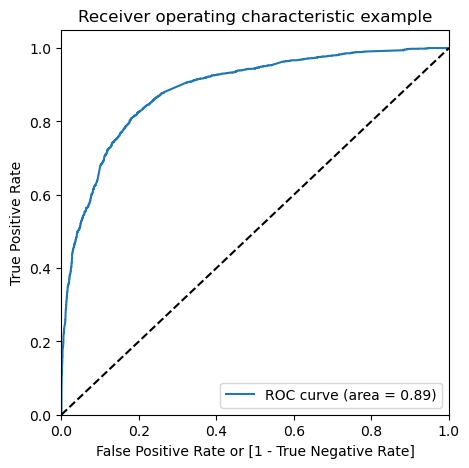

In [262]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

Since we have higher (0.89) area under the ROC curve , therefore our model is a good one.

Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [263]:
# Let's create columns with different probability cutoffs 
numbers= [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]=y_train_pred_final.Converted_prob.map(lambda x:1 if x>i else 0)
    
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.192492,3009,0,1,1,0,0,0,0,0,0,0,0
1,0,0.107074,1012,0,1,1,0,0,0,0,0,0,0,0
2,0,0.329484,9226,0,1,1,1,1,0,0,0,0,0,0
3,1,0.866550,4750,1,1,1,1,1,1,1,1,1,1,0
4,1,0.802188,7987,1,1,1,1,1,1,1,1,1,1,0


In [264]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.385136  1.000000  0.000000
0.1   0.1  0.591718  0.972200  0.353393
0.2   0.2  0.749488  0.915781  0.645327
0.3   0.3  0.800976  0.851594  0.769270
0.4   0.4  0.816249  0.775961  0.841485
0.5   0.5  0.817981  0.709730  0.885787
0.6   0.6  0.798614  0.602617  0.921383
0.7   0.7  0.786963  0.529027  0.948528
0.8   0.8  0.762557  0.427228  0.972599
0.9   0.9  0.722248  0.298446  0.987708


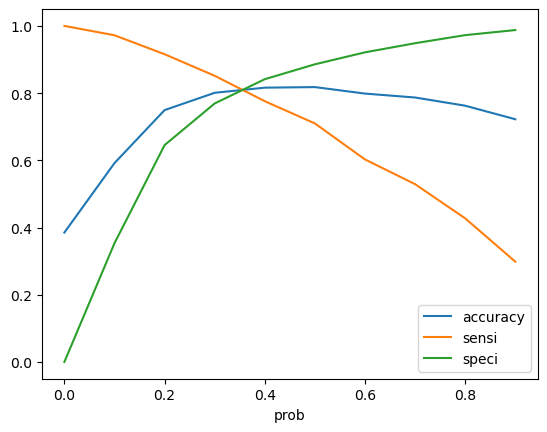

In [265]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()



In [266]:
#### From the curve above, 0.35 is the optimum point to take it as a cutoff probability.

In [267]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.35 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.192492,3009,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.107074,1012,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.329484,9226,0,1,1,1,1,0,0,0,0,0,0,0
3,1,0.866550,4750,1,1,1,1,1,1,1,1,1,1,0,1
4,1,0.802188,7987,1,1,1,1,1,1,1,1,1,1,0,1


In [268]:
## Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted,y_train_pred_final.final_predicted)

0.8132577546843017

In [269]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted,y_train_pred_final.final_predicted)
confusion2

array([[3173,  732],
       [ 454, 1992]], dtype=int64)

In [270]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [271]:
# Let's see the sensitivity of our logistic regression model

TP/float(TP+FN)

0.8143908421913328

In [272]:
# Let's see the specificity of our logistic regression model

TN/float(TN+FP)

0.8125480153649167

In [273]:
# Calculate false postive rate 

print(FP/float(TN+FP))

0.18745198463508322


In [274]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7312775330396476


In [275]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8748276812792942


## Precision and Recall

In [276]:
#Looking at the confusion matrix again

In [277]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted,y_train_pred_final.final_predicted)
confusion

array([[3173,  732],
       [ 454, 1992]], dtype=int64)

#### Precision
#### TP/TP+FP

In [278]:
confusion[1,1]/float(confusion[1,1]+confusion[0,1])

0.7312775330396476

#### Recall
#### TP / TP + FN

In [279]:
confusion[1,1]/float(confusion[1,1]+confusion[1,0])

0.8143908421913328

Using sklearn utilities for the same

In [280]:
from sklearn.metrics import precision_score, recall_score

In [281]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.7956003666361137

In [282]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.7097301717089125

### Precision and recall tradeoff

In [283]:
from sklearn.metrics import precision_recall_curve

In [284]:
y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    0
 6349    0
 6350    0
 Name: Converted, Length: 6351, dtype: int64,
 0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    1
 6349    0
 6350    0
 Name: Predicted, Length: 6351, dtype: int64)

In [285]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

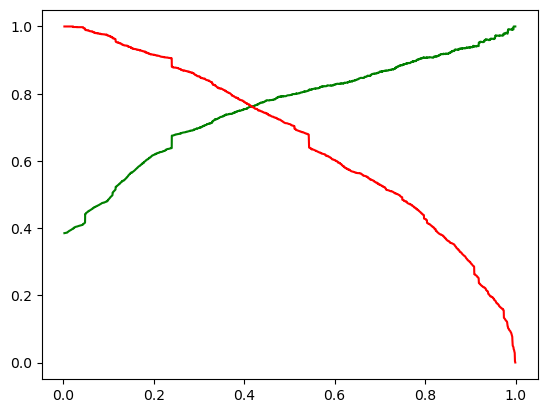

In [286]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

## Making predictions on the test set

Scaling the test data

In [289]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
                                                                                                     

In [291]:
# Assigning the columns selected by the final model to the X_test 

X_test= X_test[col1]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Activity_SMS Sent,Last Activity_Unsubscribed,Specialization_Others,What is your current occupation_Working Professional,Last Notable Activity_Modified,Last Notable Activity_Unreachable
3271,0,-0.600595,0,0,0,0,0,0,0,0,1,0,0,0
1490,0,1.887326,1,0,0,0,0,0,0,0,0,1,0,0
7936,0,-0.752879,0,0,0,0,0,0,0,0,1,0,0,0
4216,0,-0.888650,0,0,1,0,0,0,0,0,0,0,1,0
3830,0,-0.587751,1,0,0,0,0,0,0,0,0,0,0,0


In [294]:
# Adding a constant and making prediction on the test set

X_test_sm = sm.add_constant(X_test)
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

3271    0.126835
1490    0.968324
7936    0.109448
4216    0.803988
3830    0.129754
1800    0.628554
6507    0.343306
4821    0.297353
4223    0.918319
4714    0.329484
dtype: float64

In [295]:
# Converting y_test_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [296]:
# Let's see the head
y_pred_1.head()

,0
3271,0.126835
1490,0.968324
7936,0.109448
4216,0.803988
3830,0.129754


In [297]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [298]:
# Putting Prospect ID to index
y_test_df['Prospect ID'] = y_test_df.index

In [299]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [301]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final.head()

,Converted,Prospect ID,0
0,0,3271,0.126835
1,1,1490,0.968324
2,0,7936,0.109448
3,1,4216,0.803988
4,0,3830,0.129754


In [302]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [304]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(columns=['Prospect ID','Converted','Converted_prob'])
y_pred_final.head()

,Prospect ID,Converted,Converted_prob
0,3271,0,0.126835
1,1490,1,0.968324
2,7936,0,0.109448
3,4216,1,0.803988
4,3830,0,0.129754


In [305]:
y_pred_final['final_predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.34 else 0)

In [306]:
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,final_predicted
0,3271,0,0.126835,0
1,1490,1,0.968324,1
2,7936,0,0.109448,0
3,4216,1,0.803988,1
4,3830,0,0.129754,0


In [307]:
# Let's check the overall accuracy.
print("Accuracy :",metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted))

Accuracy : 0.8046272493573264


In [308]:
# Making the confusion matrix
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1395,  339],
       [ 193,  796]], dtype=int64)

In [309]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [310]:
# Let's see the sensitivity of our logistic regression model
print("Sensitivity :",TP / float(TP+FN))

Sensitivity : 0.8048533872598584


In [311]:
# Let us calculate specificity
print("Specificity :",TN / float(TN+FP))

Specificity : 0.8044982698961938


Assigning Lead Score to the Testing data

In [313]:
y_pred_final['Lead Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))

In [314]:
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,final_predicted,Lead Score
0,3271,0,0.126835,0,13
1,1490,1,0.968324,1,97
2,7936,0,0.109448,0,11
3,4216,1,0.803988,1,80
4,3830,0,0.129754,0,13


Inferences

After running the model on test data we found -
Accuracy - 80%
Specificity- 80%
Sensitivity- 80%

The customers which should be contacted are the ones whose 'Lead Score' is greater than 80.They can be termed as Hot Leads.

In [315]:
hot_leads = y_pred_final.loc[y_pred_final['Lead Score']>80]
hot_leads

,Prospect ID,Converted,Converted_prob,final_predicted,Lead Score
1,1490,1,0.968324,1,97
8,4223,1,0.918319,1,92
16,1946,1,0.924928,1,92
21,2461,1,0.992885,1,99
23,5822,1,0.998023,1,100
...,...,...,...,...,...
2694,1566,1,0.946456,1,95
2699,6461,1,0.961588,1,96
2703,5741,1,0.909023,1,91
2715,6299,1,0.872498,1,87


So there are 432 hot leads which can be contacted further.

Finding out the Important Features from our final model

In [317]:
res.params.sort_values(ascending=False)

Lead Source_Welingak Website                            5.858769
Lead Source_Reference                                   3.340121
What is your current occupation_Working Professional    2.606375
Last Activity_Other_Activity                            2.198777
Last Notable Activity_Unreachable                       1.546980
Last Activity_Unsubscribed                              1.378366
Last Activity_SMS Sent                                  1.325023
Total Time Spent on Website                             1.097643
Lead Source_Olark Chat                                  1.091475
const                                                  -0.071692
Last Notable Activity_Modified                         -0.881599
Last Activity_Olark Chat Conversation                  -0.948539
Lead Origin_Landing Page Submission                    -1.186301
Specialization_Others                                  -1.198306
Do Not Email                                           -1.678278
dtype: float64